In [1]:
# === SETUP ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots look good
sns.set(style="whitegrid", palette="muted")

print("✅ Libraries loaded successfully.")


✅ Libraries loaded successfully.


In [2]:
# === DATA CREATION ===
np.random.seed(42)

data = {
    "Age": np.random.randint(18, 60, size=30),
    "Education_Level": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=30),
    "Income": np.random.randint(1000, 5000, size=30),
    "Purchased": np.random.choice(["Yes", "No"], size=30, p=[0.4, 0.6])
}

df = pd.DataFrame(data)
df.head()


,Age,Education_Level,Income,Purchased
0,56,Master,3139,No
1,46,Bachelor,2390,No
2,32,Bachelor,4003,Yes
3,25,Master,2478,Yes
4,38,Bachelor,4499,Yes


In [38]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int32  
 1   Education  30 non-null     object 
 2   Income     30 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(1), int32(1), object(2)
memory usage: 972.0+ bytes


(30, 4)

In [14]:
df[["Age", "Income"]]
df["Education_Level"].value_counts()
(df["Age"]>59).value_counts()

Age
False    30
Name: count, dtype: int64

In [19]:
df["Income_per_age"] = df["Income"]/df["Age"]
df.rename(columns={"Education_Level": "Education"}, inplace=True)
df.head()
df.drop("Income_per_age", axis=1, inplace=True)
df.head()

,Age,Education,Income,Purchased
0,56,Master,3139,No
1,46,Bachelor,2390,No
2,32,Bachelor,4003,Yes
3,25,Master,2478,Yes
4,38,Bachelor,4499,Yes


In [21]:
df.groupby("Education")["Income"].mean()

df[df["Purchased"] == "Yes"]["Age"].min()

np.int32(20)

<Axes: xlabel='Purchased', ylabel='count'>

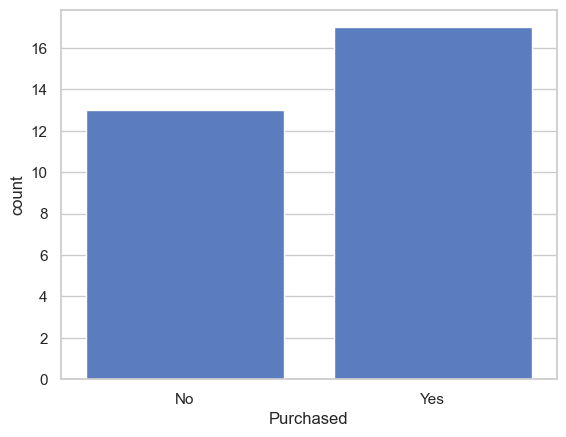

In [25]:
sns.countplot(x="Purchased", data=df)

<Axes: xlabel='Age', ylabel='Count'>

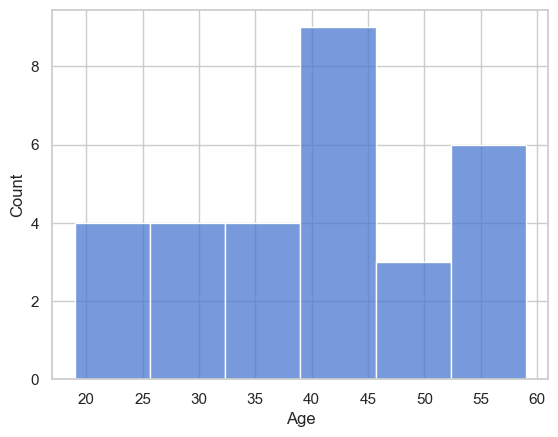

In [26]:
sns.histplot(x="Age", data=df)

<Axes: xlabel='Education', ylabel='Income'>

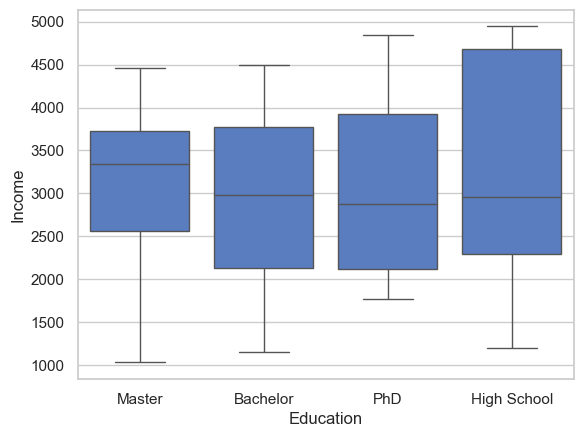

In [27]:
sns.boxplot(x="Education", y="Income", data=df)

In [34]:
df.loc[5, "Income"] = np.nan
df.isnull().sum()
df.fillna({"Income": df["Income"].mean()}, inplace=True)
df.head(6)

,Age,Education,Income,Purchased
0,56,Master,3139.000000,No
1,46,Bachelor,2390.000000,No
2,32,Bachelor,4003.000000,Yes
3,25,Master,2478.000000,Yes
4,38,Bachelor,4499.000000,Yes
5,56,Master,3070.448276,Yes


ValueError: could not convert string to float: 'Master'